In [1]:
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers, callbacks

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.style.use('seaborn-whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
      titleweight='bold', titlesize=18, titlepad=10)

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_train = data.sample(frac=0.7, random_state=0)
df_valid = data.drop(df_train.index)

In [4]:
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
X_train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,10.8,0.47,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8
1032,8.1,0.82,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
1002,9.1,0.29,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7


In [5]:
y_train = df_train['quality']
y_valid = df_valid['quality']
y_train.head(3)

1109    6
1032    5
1002    7
Name: quality, dtype: int64

## Create the Neural Network
+ With Dropout and BatchNormalization Layers

In [6]:
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)
])

In [7]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 20,
    restore_best_weights = True
)

In [8]:
model.compile(optimizer='adam', loss='mae')

In [9]:
model_data = model.fit(X_train, y_train,
                   validation_data = (X_valid, y_valid),
                   batch_size = 128,
                   epochs = 300,
                   callbacks = [early_stopping])

Epoch 1/300
9/9 [==============================] - 1s 67ms/step - loss: 5.4492 - val_loss: 8.1800
Epoch 2/300
9/9 [==============================] - 0s 45ms/step - loss: 5.0210 - val_loss: 3.4557
Epoch 3/300
9/9 [==============================] - 0s 45ms/step - loss: 4.5560 - val_loss: 4.8523
Epoch 4/300
9/9 [==============================] - 0s 44ms/step - loss: 4.0330 - val_loss: 3.8138
Epoch 5/300
9/9 [==============================] - 0s 45ms/step - loss: 3.3627 - val_loss: 8.7432
Epoch 6/300
9/9 [==============================] - 0s 48ms/step - loss: 2.7101 - val_loss: 1.6557
Epoch 7/300
9/9 [==============================] - 0s 46ms/step - loss: 2.0581 - val_loss: 2.5056
Epoch 8/300
9/9 [==============================] - 0s 53ms/step - loss: 1.6579 - val_loss: 4.1299
Epoch 9/300
9/9 [==============================] - 0s 49ms/step - loss: 1.4569 - val_loss: 4.5660
Epoch 10/300
9/9 [==============================] - 0s 47ms/step - loss: 1.3789 - val_loss: 1.6645
Epoch 11/300
9/9 [=

Epoch 84/300
9/9 [==============================] - 0s 48ms/step - loss: 0.6964 - val_loss: 0.5371
Epoch 85/300
9/9 [==============================] - 0s 51ms/step - loss: 0.6849 - val_loss: 0.6225
Epoch 86/300
9/9 [==============================] - 0s 47ms/step - loss: 0.6816 - val_loss: 0.5654
Epoch 87/300
9/9 [==============================] - 0s 47ms/step - loss: 0.6832 - val_loss: 0.5350
Epoch 88/300
9/9 [==============================] - 0s 49ms/step - loss: 0.6710 - val_loss: 0.5902
Epoch 89/300
9/9 [==============================] - 0s 46ms/step - loss: 0.6863 - val_loss: 0.5690
Epoch 90/300
9/9 [==============================] - 0s 46ms/step - loss: 0.6940 - val_loss: 0.5620
Epoch 91/300
9/9 [==============================] - 0s 51ms/step - loss: 0.6733 - val_loss: 0.6142
Epoch 92/300
9/9 [==============================] - 0s 45ms/step - loss: 0.6712 - val_loss: 0.5473
Epoch 93/300
9/9 [==============================] - 0s 47ms/step - loss: 0.6544 - val_loss: 0.5449
Epoch 94/3

In [10]:
history = model_data.history

df_hist = pd.DataFrame(history)
df_hist.head()

,loss,val_loss
0,5.449165,8.180017
1,5.021014,3.455665
2,4.556010,4.852292
3,4.032956,3.813835
4,3.362670,8.743213


In [11]:
df_hist.val_loss.min()

0.523825466632843

<AxesSubplot:>

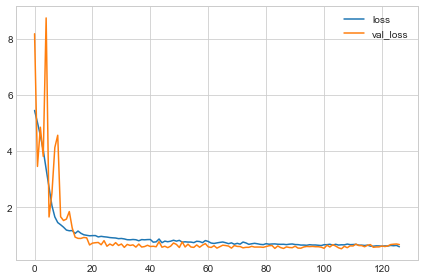

In [12]:
df_hist.plot()